In [1]:
%pip install scipy --upgrade
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [2]:
#Set the seed for reproducibility
np.random.seed(5566)

np.random.choice([1,0],5,replace=True,p=[0.5,0.5])

array([0, 1, 1, 1, 0])

In [3]:
SPay=np.array([21600,16800,12000,6000,0])
SPayProb=np.array([0.05,0.25,0.4,0.25,0.05])

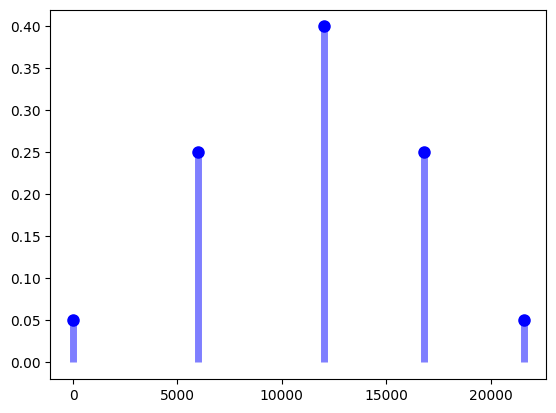

In [4]:
plt.plot(SPay, SPayProb, 'bo', ms=8, label='School Pay')
plt.vlines(SPay, 0, SPayProb, colors='b', lw=5, alpha=0.5)

In [5]:
JohnPay = 12000

#Pay from Vanessa
VPay=14000

#The probability of getting the job from Vanessa
probV = np.arange(0.1,1,0.1)
print(probV)

#Simulation runs
S = 10000

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [6]:
#Earnings of Waiting for Vanessa's offer
results1=np.empty([S,len(probV)])

for v in range(len(probV)):
  #Sample Vanessa's decision
  VanessaOffer=np.random.choice([1,0],S,replace=True,p=[probV[v],1-probV[v]])
  VYesid=np.where(VanessaOffer==1)
  VNoid=np.where(VanessaOffer==0)
  #Obtain 14000 if Vanessa says Yes
  results1[VYesid,v]=VPay
  #Obtain a random school pay if Vanessa says No
  results1[VNoid,v]=np.random.choice(SPay,
            np.sum(VanessaOffer==0),
            replace=True,p=SPayProb)


In [7]:
results1[0:10,0:5]

array([[12000., 16800., 12000., 14000., 21600.],
       [21600., 12000., 14000., 16800., 14000.],
       [ 6000.,     0., 12000., 16800., 16800.],
       [16800., 14000., 12000., 14000., 12000.],
       [16800., 16800., 12000., 14000., 14000.],
       [16800., 21600., 16800., 12000., 14000.],
       [12000., 16800., 12000., 14000., 14000.],
       [12000.,  6000., 14000., 16800., 14000.],
       [12000., 14000., 14000., 16800., 16800.],
       [12000., 16800., 12000.,  6000., 14000.]])

In [8]:
#Compute percentiles of earnings under each probV
pctiles=np.array([0.1,0.25,0.5,0.75,0.9])
paytiles=np.empty([len(probV),len(pctiles)])

pbetter=np.empty(len(probV))

for i in range(len(probV)):
  #Compute the percentiles of earning under each P(VanessaYes)
  paytiles[i,]=np.quantile(results1[:,i],pctiles)
  #Compute the probability of earning more than 12000
  pbetter[i]=np.sum(results1[:,i]>=JohnPay)/S

In [9]:
paytiles

array([[ 6000.,  6000., 12000., 16800., 16800.],
       [ 6000., 12000., 12000., 14000., 16800.],
       [ 6000., 12000., 14000., 14000., 16800.],
       [ 6000., 12000., 14000., 14000., 16800.],
       [ 6000., 12000., 14000., 14000., 16800.],
       [ 6000., 12000., 14000., 14000., 16800.],
       [12000., 14000., 14000., 14000., 14000.],
       [12000., 14000., 14000., 14000., 14000.],
       [14000., 14000., 14000., 14000., 14000.]])

In [10]:
pbetter

array([0.7289, 0.7574, 0.7945, 0.8274, 0.8515, 0.8842, 0.9134, 0.9402,
       0.9691])

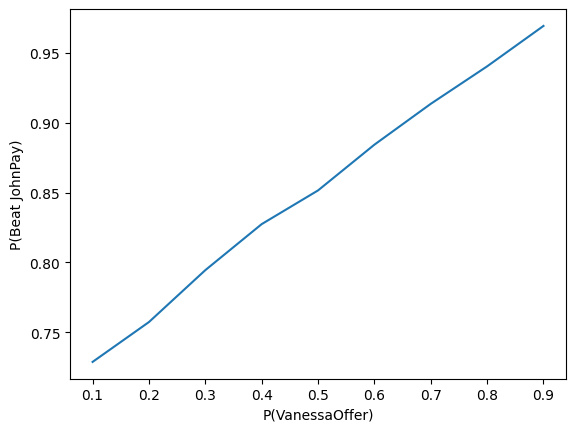

In [11]:
plt.plot(probV,pbetter)
plt.xlabel("P(VanessaOffer)")
plt.ylabel("P(Beat JohnPay)")
plt.title("")
plt.show()

# **Distance between Distributions**

In [12]:
from scipy.stats import wasserstein_distance

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html

In [13]:
outcome=np.arange(1,7,1)
outcome

array([1, 2, 3, 4, 5, 6])

In [14]:
dieA_prob=np.array([0.3,0.1,0.1,0.2,0.2,0.1])
dieB_prob=np.array([0.1,0.3,0.1,0.2,0.2,0.1])
dieC_prob=np.array([0.1,0.1,0.1,0.2,0.2,0.3])

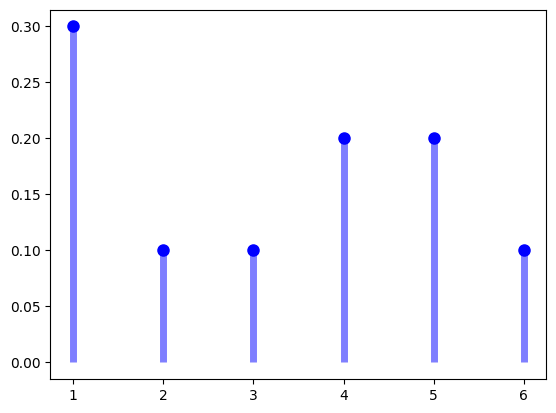

In [15]:
plt.plot(outcome, dieA_prob, 'bo', ms=8, label='Die A')
plt.vlines(outcome, 0, dieA_prob, colors='b', lw=5, alpha=0.5)

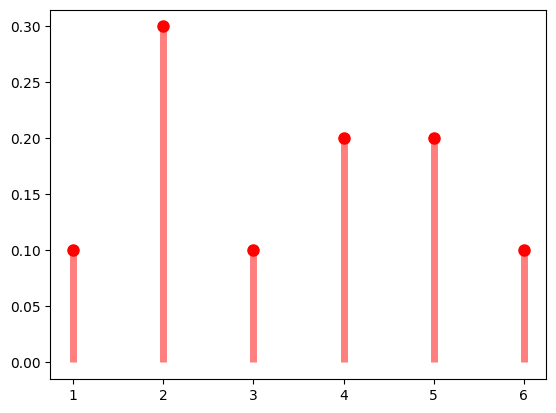

In [16]:
plt.plot(outcome, dieB_prob, 'ro', ms=8, label='Die B')
plt.vlines(outcome, 0, dieB_prob, colors='r', lw=5, alpha=0.5)

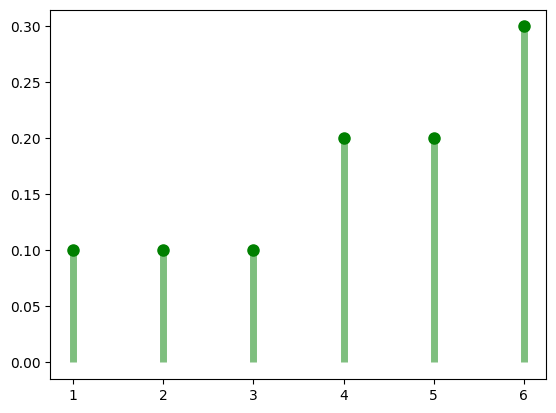

In [17]:
plt.plot(outcome, dieC_prob, 'go', ms=8, label='Die B')
plt.vlines(outcome, 0, dieC_prob, colors='g', lw=5, alpha=0.5)

In [18]:
wasserstein_distance(outcome, outcome,dieA_prob,dieB_prob)

0.2

In [19]:
wasserstein_distance(outcome, outcome,dieA_prob,dieC_prob)

1.0000000000000004